# Introduction to Python for Linear Algebra

In [2]:
import numpy as np
import scipy

a_vec = np.array([1, 2, 3])
A = np.array([[1, 1, -1], [2, 0, 0], [0, 1, 2]])
print(A.shape)

(3, 3)


In [3]:
np.linspace(start=0, stop=1, num=10)
np.arange(start=0, stop=10, step=2, dtype=np.int32)
np.zeros(shape=(2, 3), dtype=np.float64)
np.ones((4, 5))
np.zeros_like(a_vec)
np.diag(a_vec)
np.random.randn(2, 2, 3) # matrix 2x2x3 with random elements

array([[[-0.28854525,  0.08380975,  0.29234304],
        [-0.30683075, -0.35202316, -1.55207848]],

       [[-0.36836081,  2.10083426,  0.4036407 ],
        [ 0.08748774,  0.50520134, -0.82638068]]])

## Exercise

In [4]:
A = np.ones((3, 3))+ np.diag(np.ones((3)))
print(A)
print(A.shape)

[[2. 1. 1.]
 [1. 2. 1.]
 [1. 1. 2.]]
(3, 3)


In [5]:
np.exp(A) # e^A element wise
np.sin(A)
np.cos(A)
np.tan(A)
np.log(A)

array([[0.69314718, 0.        , 0.        ],
       [0.        , 0.69314718, 0.        ],
       [0.        , 0.        , 0.69314718]])

In [6]:
A = np.ones((2, 3))
B = np.ones((3, 4))
print(A@B) # A.shape = (m, n) and B.shape = (n, k) --> result.shape = (m,k)
print((A@B).shape)

[[3. 3. 3. 3.]
 [3. 3. 3. 3.]]
(2, 4)


In [7]:
a = np.ones(3)
b = np.ones(3)
a@b == np.dot(a, b)

True

## Exercise

In [8]:
n = 10
x1 = np.arange(0, n)
x2 = np.random.randn(n)

print(np.exp(x1)*np.exp(x2))
print(np.exp(x1+x2))

[3.40702524e-01 3.70758954e+00 4.54363546e+00 3.42091334e+01
 4.87347658e+01 1.11426061e+02 1.05843456e+02 1.63667299e+02
 2.69611149e+03 2.45780073e+04]
[3.40702524e-01 3.70758954e+00 4.54363546e+00 3.42091334e+01
 4.87347658e+01 1.11426061e+02 1.05843456e+02 1.63667299e+02
 2.69611149e+03 2.45780073e+04]


In [9]:
a = np.random.randn(50)
idx = np.random.randint(low=0, high=len(a), size=10)
print(idx)
print(a[idx]) # SLICING WITH NP VECTOR OF INDEXES

[31  1 26 14 44 24 36 35 26 22]
[ 0.27071277 -2.2766918  -0.96407279 -1.83803771  0.42988953 -0.14360898
  0.321831    0.90521317 -0.96407279 -0.56046014]


In [10]:
n=10
a = np.random.randn(n)
bool_vector = np.random.randint(0,2,n, dtype=bool)
a[bool_vector] # SLICING WITH BOOL VECTOR


array([-1.06169143, -0.53273355,  1.01915633])

## Exercise

In [11]:
n=3
A = np.random.randn(n,n)
B = A
B[A<0] = 0
B

array([[0.24739736, 0.        , 1.33997158],
       [0.        , 0.33505361, 1.06621215],
       [1.49708472, 0.        , 0.14652502]])

In [12]:
np.linalg.norm(x=A, ord=2) # DIFFERENT NORMS for VECTORS:all integers and MATRICES:{None, 1, -1, 2, -2, inf, -inf, 'fro'} (if dim>2 only the standard norm is calculated, with ord=None)
np.linalg.cond(A,p=2) # condition number???
np.linalg.matrix_rank(A)
np.linalg.inv(A)
np.reshape(A, newshape=(1,9))
np.transpose(A) == A.T

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [13]:
import pandas as pd
data = pd.read_csv("../data/US_births_2000-2014_SSA.csv")

FileNotFoundError: ignored

---
# Plotting with matplotlib

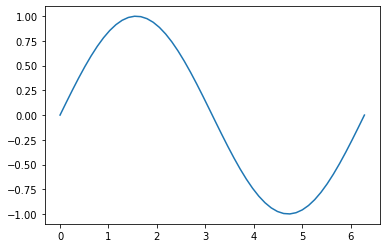

In [14]:
import numpy as np
import matplotlib.pyplot as plt

n = 50
a = 0
b = 2*np.pi

x = np.linspace(a,b,n)
y = np.sin(x)

plt.plot(x,y)
plt.show()

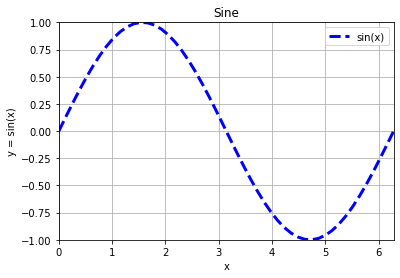

In [15]:
plt.plot(x,y, "--", color="b", linewidth=3)
plt.title("Sine")
plt.xlabel("x")
plt.ylabel("y = sin(x)")
plt.grid()
plt.xlim((a, b))
plt.ylim((-1, 1))
plt.legend(["sin(x)"])
plt.show()

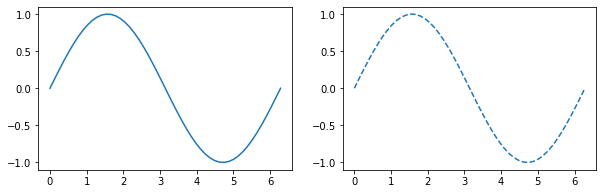

In [16]:
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.plot(x,y)
plt.subplot(1, 2, 2)
plt.plot(x,y, "--")
plt.show()

In [17]:
import pandas as pd

data = pd.read_csv("../data/US_births_2000-2014_SSA.csv")
data.head()

FileNotFoundError: ignored

In [18]:
data.rename(columns={"date_of_month":"day"}, inplace=True)
data.head()

NameError: ignored

In [19]:
# def days_until_today(date):
#     return (pd.Timestamp.today().to_pydatetime() - date).days

# data["total_date"] = pd.to_datetime(data[["year", "month", "day"]]).map(days_until_today)

data_days = pd.to_datetime(data[["year", "month", "day"]])

data["total_date"] = (data_days - data_days.min()).dt.days
data.head()

NameError: ignored

In [20]:
plt.plot(data["total_date"],data["births"])
plt.show()

NameError: ignored

In [21]:
week_data = data[["births", "day_of_week"]].groupby(["day_of_week"], as_index=False).sum()
week_data.head()

NameError: ignored

In [22]:
plt.bar(week_data["day_of_week"], week_data["births"])
plt.show()

NameError: ignored

---
# Linear Systems with Numpy and Scipy

In [23]:
A = np.array([[1, 1, 1], [2, 1, 2], [0, 0, 1]])
y = np.array([0, 1, 0])

np.linalg.solve(A, y)

array([ 1., -1.,  0.])

In [24]:
# Test Problem
n = 10

A = np.random.randn(n,n)
x_true = np.ones(n)

y = A @ x_true

x_sol = np.linalg.solve(A, y)

E_rel = np.linalg.norm(x_sol-x_true, 2) / np.linalg.norm(x_sol, 2)
print(E_rel)

4.213000162292041e-16


Invertible matrix A --> ill-conditioned if contition_number (=norm(A)*norm(A^-1)) GROWS EXPONENTIALLY with n (dim)

relative_error on x_sol <= CONDITION_NUMBER * sum on relative_errors on A (matrix) and y (b, termine noto) !!!

In [28]:
np.linalg.cond(A,2)

26.35035463514852

## PLU decomposition
L lowr-triangular, U upper (with ones on diag), P permutation (identity with shuffled rows) ORTHOGONAL 

so P^{T}A=LU --> Ax=y --> P^TAx = P^Ty --> LUx = P^Ty

Ux = z  +++ Lz = P^Ty !!!



In [ ]:
def solve(A, y):
    P, L, U = scipy.linalg.lu(A)
    z = scipy.linalg.solve_triangular(L, P.T@y, lower=True)
    x = scipy.linalg.solve_triangular(U, z, lower=False)

    return x